<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Cambria";'>
Data Correlation ....
<a class="anchor" id="1"></a> 

| |<font size="5">(Correlation )  تحديد الأرتباطات ومعالجتها  </font>|
|-:|-:|
|<img src="https://assets-global.website-files.com/5baafc2653bd67278f206724/5be2a568752a5f818c0b5640_safegraph-icon%403x.png" width=200></img>||
||<font size="4"> تحميل البيانات ومعالجتها </font>| 
||<font size="4">تحديد ترتباطات البيانات الرقمية </font>| 
||<font size="4">تخفيف الخصائص  </font>| 


## : تعميم النماذج بناء على بيانات رقمية

In [1]:
ls ../data 

HousePrice.csv                  StudentsPerformance.csv
HousePrice1.csv                 Students_Grading_Dataset.csv
HousePrice3.csv                 features_kept1.csv
StudentPerformanceFactors.xlsx  student_performance_large_dataset.csv


In [2]:
#تحميل البيانات 
import pandas as pd
df= pd.read_csv("../data/HousePrice.csv", index_col=0)

In [3]:
df.sample(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1097,1098,120,RL,NaN,3696,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,170000
615,616,85,RL,80.0,8800,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2010,WD,Abnorml,137500
90,91,20,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,109900


![](https://image.flaticon.com/icons/png/128/3079/3079166.png)

In [4]:
# تحديد نسب البينات الغائبة ضمن  المتغيرات الرقمية 
(df.select_dtypes("number").isna().sum()/df.shape[0]).sort_values(ascending=False)

LotFrontage      0.177397
GarageYrBlt      0.055479
MasVnrArea       0.005479
LotArea          0.000000
MSSubClass       0.000000
Id               0.000000
OverallCond      0.000000
OverallQual      0.000000
YearRemodAdd     0.000000
YearBuilt        0.000000
BsmtFinSF2       0.000000
BsmtUnfSF        0.000000
TotalBsmtSF      0.000000
BsmtFinSF1       0.000000
2ndFlrSF         0.000000
LowQualFinSF     0.000000
GrLivArea        0.000000
BsmtFullBath     0.000000
BsmtHalfBath     0.000000
FullBath         0.000000
HalfBath         0.000000
1stFlrSF         0.000000
BedroomAbvGr     0.000000
KitchenAbvGr     0.000000
TotRmsAbvGrd     0.000000
Fireplaces       0.000000
GarageCars       0.000000
GarageArea       0.000000
WoodDeckSF       0.000000
OpenPorchSF      0.000000
EnclosedPorch    0.000000
3SsnPorch        0.000000
ScreenPorch      0.000000
PoolArea         0.000000
MiscVal          0.000000
MoSold           0.000000
YrSold           0.000000
SalePrice        0.000000
dtype: float

In [5]:
pd.options.display.max_columns=99
df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


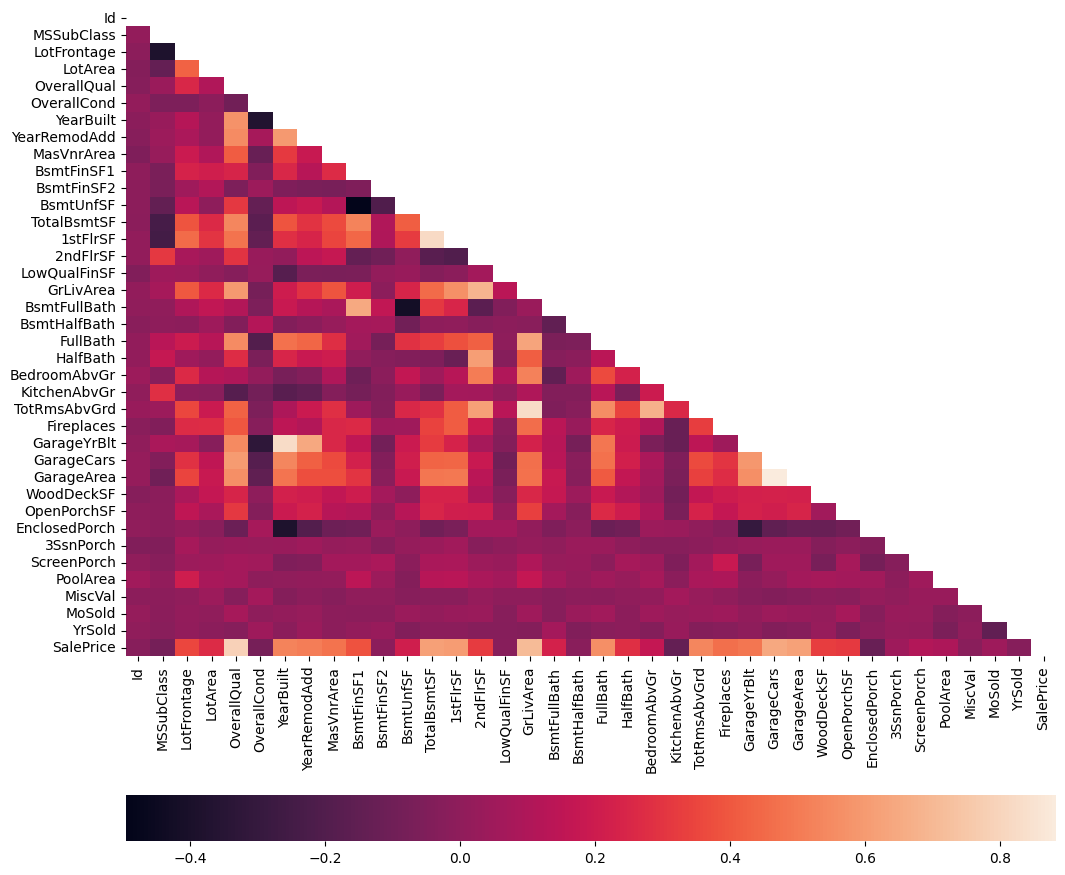

In [6]:
import matplotlib.pyplot as plt
import numpy  as np
import seaborn as sns
plt.figure(figsize=(12,12))
matrix = np.triu(df.select_dtypes("number").corr())
_=sns.heatmap(df.select_dtypes("number").corr(),  mask=matrix, cbar_kws= {'orientation': 'horizontal'}, annot=False)


In [7]:
df.select_dtypes("number").corr().T

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000072,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451

In [8]:
df.select_dtypes("number").keys()

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [9]:
#  قائمة المتغيرات الأكثر ارتباطا بعضها ببعض  

corr = df.select_dtypes("number").corr()
corr[corr == 1] = 0
corr_cols = corr.max().sort_values(ascending=False)
corr_cols[corr_cols > 0.7]  # الاكتفاء بالمتغيرات التي يفوق ارتياطها 80% باحدى باقي المتغيرات

GarageArea      0.882475
GarageCars      0.882475
GarageYrBlt     0.825667
YearBuilt       0.825667
GrLivArea       0.825489
TotRmsAbvGrd    0.825489
TotalBsmtSF     0.819530
1stFlrSF        0.819530
SalePrice       0.790982
OverallQual     0.790982
dtype: float64

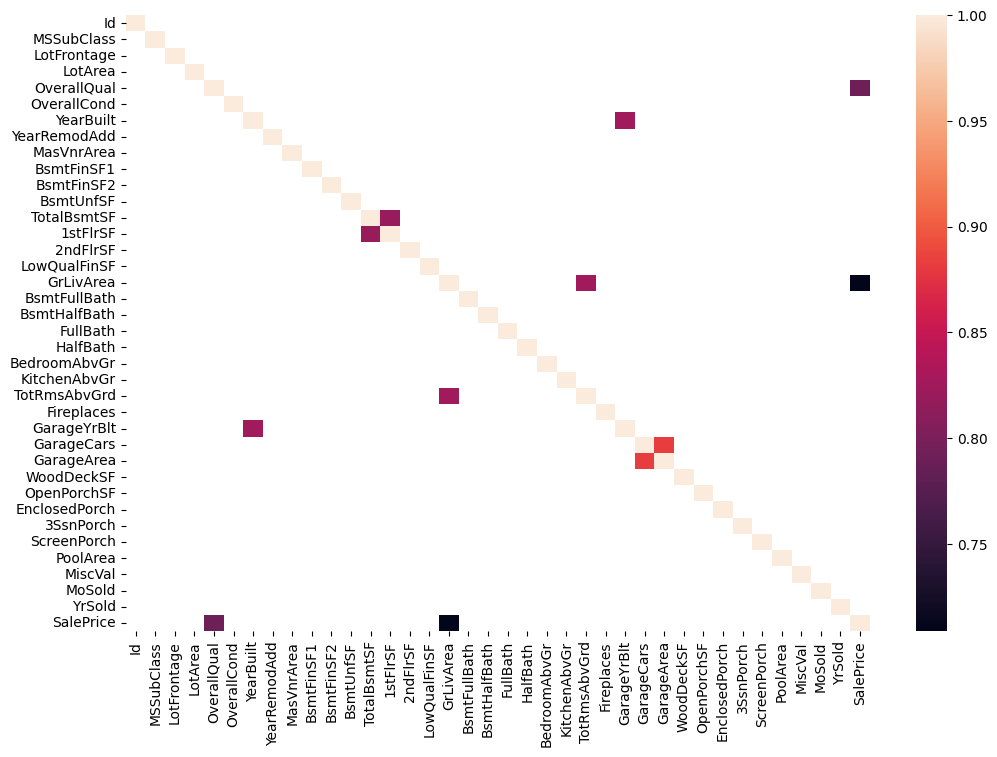

In [10]:

plt.figure(figsize=(12,8))
corr = df.select_dtypes("number").corr() 
_=sns.heatmap(corr[corr>=.7]) #, cmap="Greens")
# _تناسب تواريخ بناء البيت والمرآب_

In [11]:
df[['1stFlrSF', "2ndFlrSF"]].corr()

,1stFlrSF,2ndFlrSF
1stFlrSF,1.000000,-0.202646
2ndFlrSF,-0.202646,1.000000


In [12]:

df[['TotalBsmtSF', "1stFlrSF"]].corr()

,TotalBsmtSF,1stFlrSF
TotalBsmtSF,1.00000,0.81953
1stFlrSF,0.81953,1.00000


In [13]:
df[['GarageCars','GarageArea', 'YearBuilt',  'GarageYrBlt']].corr()

,GarageCars,GarageArea,YearBuilt,GarageYrBlt
GarageCars,1.000000,0.882475,0.537850,0.588920
GarageArea,0.882475,1.000000,0.478954,0.564567
YearBuilt,0.537850,0.478954,1.000000,0.825667
GarageYrBlt,0.588920,0.564567,0.825667,1.000000


In [14]:
df.drop(['GarageCars', 'GarageYrBlt',"1stFlrSF" ], axis=1, inplace=True)
# check correlation between  'TotRmsAbvGrd'  and YearBuilt

In [15]:
df.shape

(1460, 78)

In [16]:
df.to_csv("../data/HousePrice3.csv")